 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Read the daily closing prices of whale_return, set the `date` as a datetime index
whale_return = Path("Resources/whale_returns.csv")
wr_df = pd.read_csv(whale_return, index_col="Date", parse_dates=True, infer_datetime_format=True,)

wr_df.sort_index(ascending=True, inplace=True)

 
wr_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wr_df.isnull()

# Determining number of nulls
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
wr_df.dropna(inplace=True)


In [5]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column AGAIN
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Use the "drop_duplicates()"to drop any duplicates
wr_df.drop_duplicates()
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
# Read the daily closing prices of algo_return, set the `date` as a datetime index
algo_return = Path("Resources/algo_returns.csv")
ar_df = pd.read_csv(algo_return, index_col="Date", parse_dates=True, infer_datetime_format=True)
ar_df.sort_index(ascending=True, inplace=True)

ar_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
ar_df.isnull()

# Determining number of nulls
ar_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
ar_df.dropna(inplace=True)

In [10]:
# Use the "drop_duplicates()"to drop any duplicates
ar_df.drop_duplicates()
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [11]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column AGAIN
ar_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [21]:
# Reading S&P 500 Closing Prices
# Read the daily closing prices of sp500, set the `date` as a datetime index
sp500 = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(ascending=True, inplace=True)

sp500_df.head() 

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [22]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [23]:
# Fix Data Types
#sp500_df["Close"] = sp500_df["Close"].str.replace("$", " ") Warning due because is already a string
# {Curly Braces" are used in Python to define a dictionary. A dictionary is a data structure that maps one value to another so .string not needed
#sp500_df["Close"] = sp500_df["Close"].replace({"$", " "}, regex = True) 
#sp500_df['Close'] =sp500_df['Close'].astype(float)

sp500_df['Close'] = sp500_df['Close'].replace({'\$': '', ',': ''}, regex=True).astype(float) 

#sp500_df.dtypes
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [24]:
# Fix Data Types
# Use the `as_type` function to convert `Close` from `float` to `int`
sp500_df['Close'] = sp500_df['Close'].astype('int')

sp500_df.dtypes



Close    int64
dtype: object

In [25]:
# Calculate Daily Returns
# Use the `pct_change` function to calculate daily returns 
sp500r_df = sp500_df.pct_change()

#print(sp500_dr)
sp500r_df.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684


In [26]:
# Drop nulls
# Use the `dropna` function to drop whole records that have at least one null value
sp500r_df.dropna(inplace=True)

sp500r_df.isnull().sum()

Close    0
dtype: int64

In [27]:
# Rename `Close` Column to be specific to this portfolio.
sp500r_df.columns = ["S&P_500"]
sp500r_df.head()

,S&P_500
Date,
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684
2012-10-08,-0.003425


## Combine Whale, Algorithmic, and S&P 500 Returns

In [56]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
##combined_R_df = Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns

combined_R_df = pd.concat([wr_df, ar_df,sp500r_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_R_df.sort_index(ascending = True, inplace=True)


# Display a few rows of the combined RETURNS' TABLE
combined_R_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004724
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004271
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001430
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014279
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003863


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

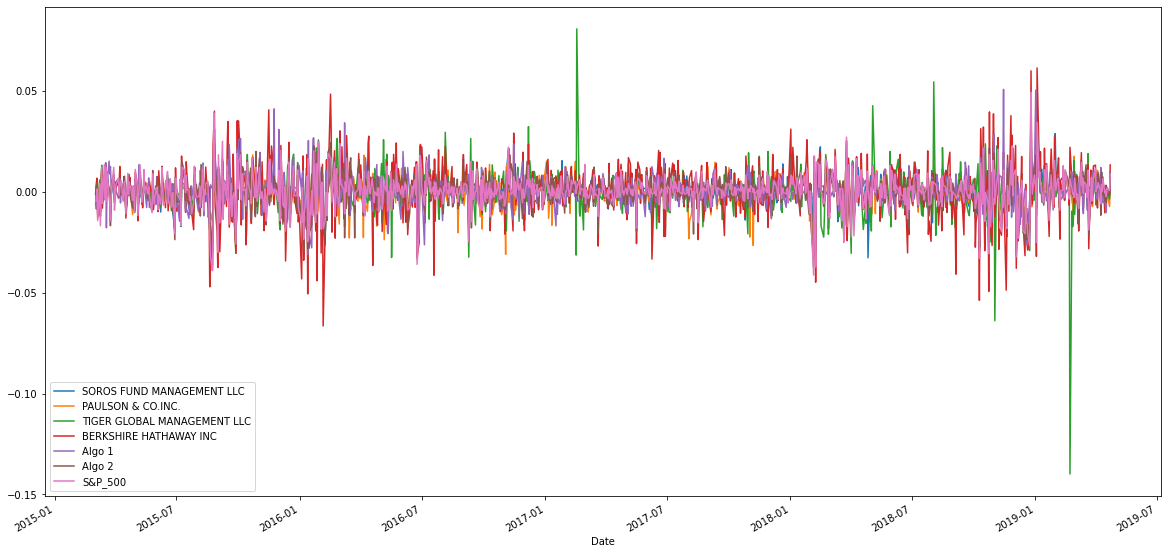

In [29]:
# Plot daily returns of all portfolios
combined_DR_df.plot(figsize=(20,10))

In [51]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
#COMBNED DAILY RETUNS DATAFRAME = combined_DRPCT_df
combined_DRPCT_df = combined_DR_df.pct_change()
combined_DRPCT_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.095729
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-1.334763
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-10.985721
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-1.270530


#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   
2019-04-23                     0.861189                1.553401  1.934691   

              Algo 2   S&P_500  

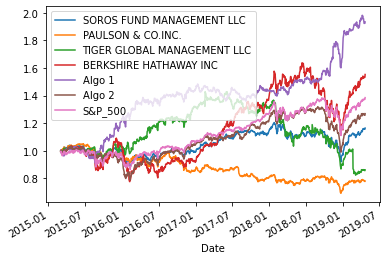

In [46]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_DR_df).cumprod()

# Plot cumulative returns

cumulative_returns.plot()
print(cumulative_returns.tail())


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

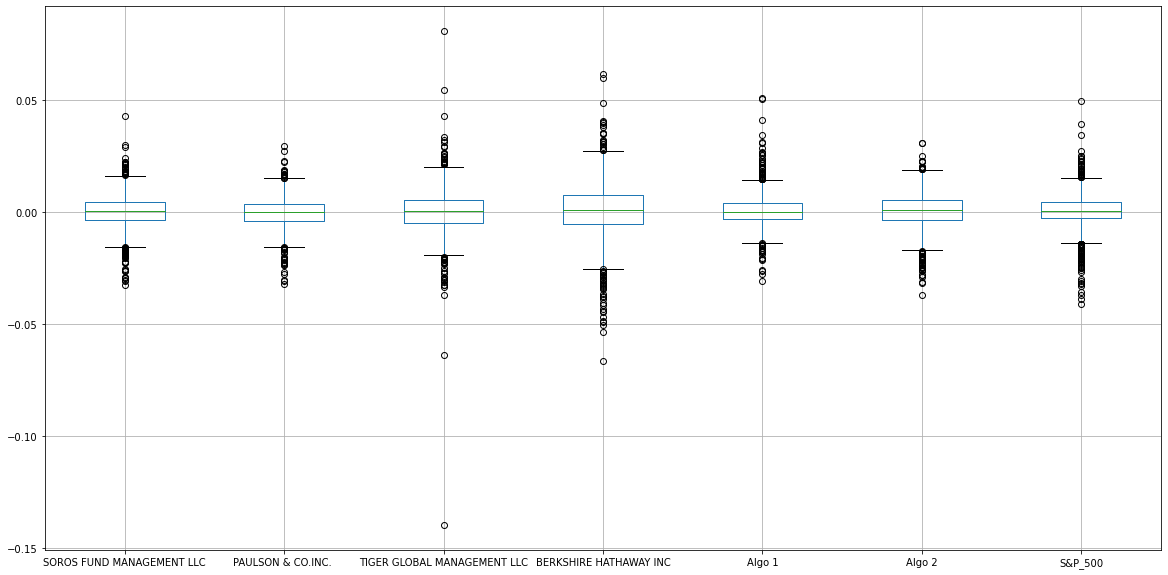

In [47]:
# Box plot to visually show risk
combined_DR_df.boxplot(figsize=(20,10))


### Calculate Standard Deviations

In [55]:
# Calculate the daily standard deviations of all portfolios
Std_combined_DRPCT_df=combined_DRPCT_df.std()
Std_combined_DRPCT_df.sort_values(inplace=True)
Std_combined_DRPCT_df

Algo 1                          15.710988
Algo 2                         682.184701
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
S&P_500                               NaN
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [49]:
# Calculate  the daily standard deviation of S&P 500
sp500r_std = combined_DR_df["S&P_500"].std()
sp500r_std

# Determine which portfolios are riskier than the S&P 500



0.008552784618190092

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_DR_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P_500                        0.135771
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!